<h1>Actividad Integradora 3</h1>
<h2>Equipo 3</h2>
<h3>Fernando Limón Flores A00819824</h3>
<h3>Ricardo Marcelo Lozano Gil A01176405</h3>
<h3>Hector Noel Leon Quiroz A01251806</h3>
<h3>Vacio</h3>
<h3>Vacio</h3>

<h2>Data Augmentation</h2>

In [ ]:
setPath = 'train'
classes = os.listdir(setPath)
if '.DS_Store' in classes: classes.remove('.DS_Store')
imgNumber = list()

for imgClass in classes:
    images = os.listdir(setPath + "/" + imgClass)
    for image in images:
        image_path = setPath + "/" + imgClass + "/" + image
        n_image = np.expand_dims(plt.imread(image_path),0)
        aug_iter = gen.flow(n_image, save_to_dir=setPath + "/" + imgClass, save_prefix='aug-image-', save_format='jpeg')
        aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]
    imgNumber.append(len(images))
    
print(imgNumber)

In [5]:
gen = ImageDataGenerator(rotation_range=5, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=5., horizontal_flip=True, vertical_flip=True)

In [18]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

<h2>Recolección y procesamiento de datos</h2>

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

<h3>Conjunto de entrenamiento</h3>

In [2]:
setPath = 'train'
classes = os.listdir(setPath)
if '.DS_Store' in classes: classes.remove('.DS_Store')
imgNumber = list()

for imgClass in classes:
    images = os.listdir(setPath + "/" + imgClass)
    imgNumber.append(len(images))
    
print(classes)
print(imgNumber)

['ant', 'lion', 'monkey', 'owl', 'turtle']
[859, 874, 860, 878, 871]


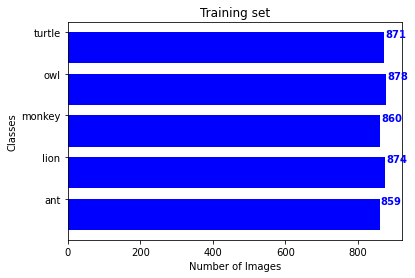

In [3]:
x = classes
y = imgNumber

fig, ax = plt.subplots()    
width = 0.75
ind = np.arange(len(y))
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Training set')
plt.xlabel('Number of Images')
plt.ylabel('Classes')
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.show()

<h3>Conjunto de prueba</h3>

In [4]:
setPath = 'test'
classes = os.listdir(setPath)
if '.DS_Store' in classes: classes.remove('.DS_Store')
imgNumber = list()

for imgClass in classes:
    images = os.listdir(setPath + "/" + imgClass)
    imgNumber.append(len(images))
    
print(classes)
print(imgNumber)

['ant', 'lion', 'monkey', 'owl', 'turtle']
[245, 249, 245, 251, 249]


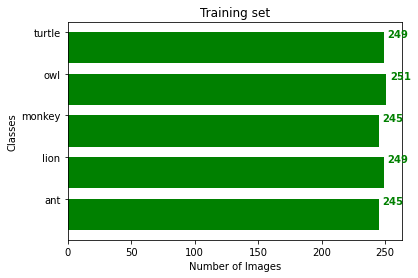

In [5]:
x = classes
y = imgNumber

fig, ax = plt.subplots()    
width = 0.75
ind = np.arange(len(y))
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Training set')
plt.xlabel('Number of Images')
plt.ylabel('Classes')
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='green', fontweight='bold')
plt.show()

<h3>Conjunto de validación</h3>

In [6]:
setPath = 'validation'
classes = os.listdir(setPath)
if '.DS_Store' in classes: classes.remove('.DS_Store')
imgNumber = list()

for imgClass in classes:
    images = os.listdir(setPath + "/" + imgClass)
    imgNumber.append(len(images))
    
print(classes)
print(imgNumber)

['ant', 'lion', 'monkey', 'owl', 'turtle']
[124, 126, 124, 126, 125]


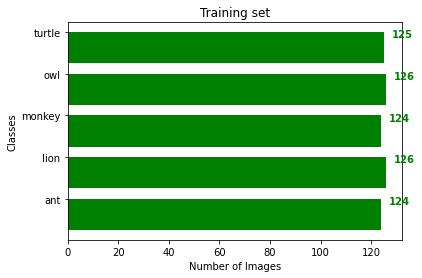

In [7]:
x = classes
y = imgNumber

fig, ax = plt.subplots()    
width = 0.75
ind = np.arange(len(y))
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Training set')
plt.xlabel('Number of Images')
plt.ylabel('Classes')
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='green', fontweight='bold')
plt.show()

<h2>Selección y entrenamiento de modelos</h2>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


<h3>Data Augmentation</h3>

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [8]:
gen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=5., horizontal_flip=True)

In [10]:
# only run once
setPath = 'train'
classes = os.listdir(setPath)
if '.DS_Store' in classes: classes.remove('.DS_Store')
imgNumber = list()

for imgClass in classes:
    images = os.listdir(setPath + "/" + imgClass)
    for image in images:
        image_path = setPath + "/" + imgClass + "/" + image
        n_image = np.expand_dims(plt.imread(image_path),0)
        aug_iter = gen.flow(n_image, save_to_dir= setPath + "/" + imgClass, save_prefix='aug-image-', save_format='jpeg')
        aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

### Pre-procesando la Información

In [11]:
train_path = 'train'
valid_path = 'validation'
test_path = 'test'

In [12]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['ant', 'lion', 'monkey', 'owl', 'turtle'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['ant', 'lion', 'monkey', 'owl', 'turtle'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['ant', 'lion', 'monkey', 'owl', 'turtle'], batch_size=10, shuffle=False)

Found 33416 images belonging to 5 classes.
Found 626 images belonging to 5 classes.
Found 1240 images belonging to 5 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

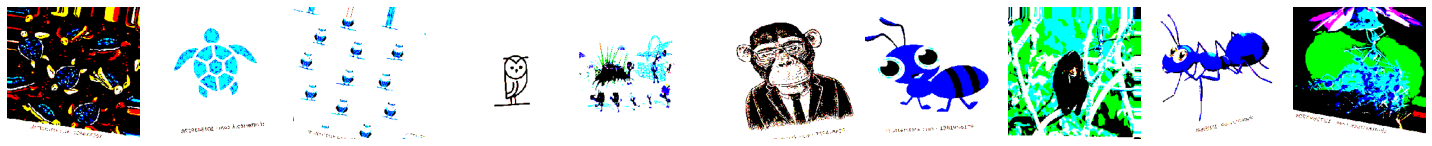

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [13]:
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

### Construyendo el Modelo

In [14]:
vgg16_model = tf.keras.applications.vgg16.VGG16()
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [16]:
for layer in model.layers:
    layer.trainable = False

In [17]:
model.add(Dense(units=5, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

### Entrenando Modelo

In [20]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
3342/3342 - 271s - loss: 0.5043 - accuracy: 0.8155 - val_loss: 0.4673 - val_accuracy: 0.8339
Epoch 2/5
3342/3342 - 175s - loss: 0.2749 - accuracy: 0.9052 - val_loss: 0.4429 - val_accuracy: 0.8403
Epoch 3/5
3342/3342 - 176s - loss: 0.2053 - accuracy: 0.9324 - val_loss: 0.4503 - val_accuracy: 0.8419
Epoch 4/5
3342/3342 - 176s - loss: 0.1630 - accuracy: 0.9480 - val_loss: 0.4557 - val_accuracy: 0.8530
Epoch 5/5
3342/3342 - 175s - loss: 0.1348 - accuracy: 0.9597 - val_loss: 0.4835 - val_accuracy: 0.8498


<h2>Evaluación y métricas de desempeño</h2>

<h2>Despliegue y reproducibilidad del modelo</h2>